In [3]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pwd=os.getcwd()
filepath = os.path.join(pwd,"housing.csv")
filepath

'/home/jovyan/git-repos/examples/examples/tensorflow/housing.csv'

In [7]:
data=pd.read_csv(filepath)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

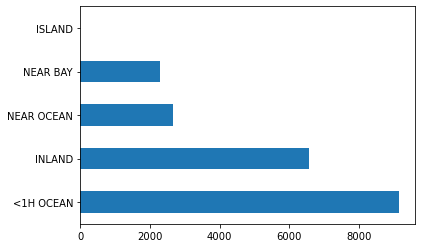

In [8]:
data["ocean_proximity"].value_counts().plot(kind="barh")

In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

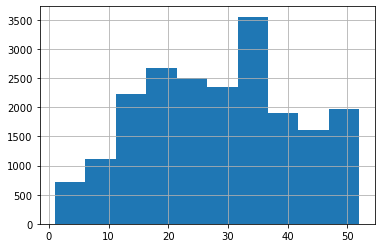

In [10]:
data["housing_median_age"].hist()

<AxesSubplot:>

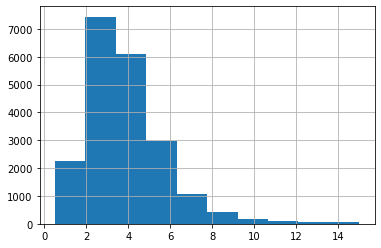

In [11]:
data["median_income"].hist()

In [12]:
data["income_cat"]=pd.cut(data["median_income"],
                          bins=[0.,1.5,3.0,4.5,6.,np.inf],
                         labels=[1,2,3,4,5])
data["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

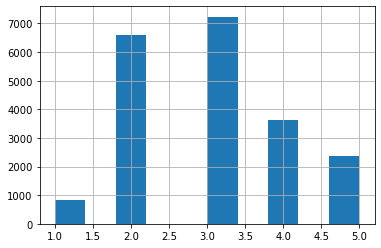

In [13]:
data["income_cat"].hist()

In [14]:
y=data["median_house_value"]
X=data.drop("median_house_value",axis=1)
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

## Split Dataset

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [16]:
pip install scikit-learn

  Using cached scikit_learn-1.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.4 MB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

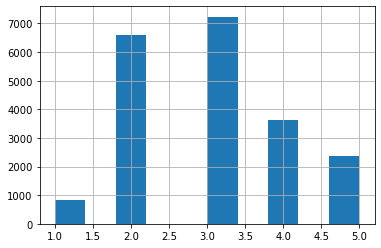

In [18]:
data["income_cat"].hist()

<AxesSubplot:>

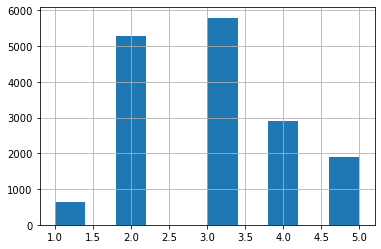

In [19]:
x_train["income_cat"].hist()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(data,data["income_cat"]):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

strat_train_set["median_house_value"]


12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [21]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [22]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [23]:
data["income_cat"].value_counts()/len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [24]:
strat_train_set.drop("income_cat", axis = "columns", inplace=True)
strat_test_set.drop("income_cat", axis = "columns", inplace=True)

# Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

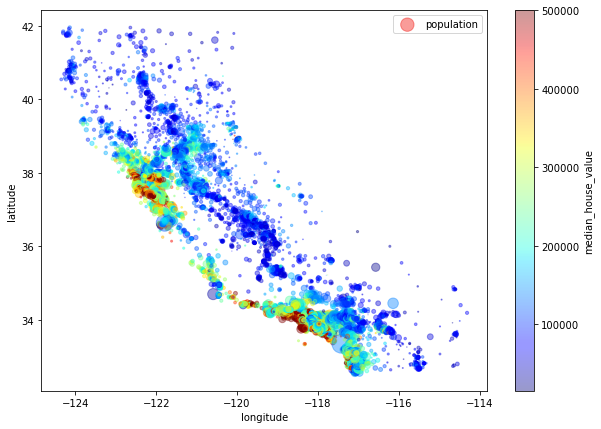

In [25]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
          s=data["population"]/100,label="population",figsize=(10,7),
          c="median_house_value",cmap=plt.get_cmap("jet"),
          colorbar=True,sharex=False)

# Visualizing Data


In [26]:
train_data = strat_train_set.copy()
test_data = strat_test_set.copy()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

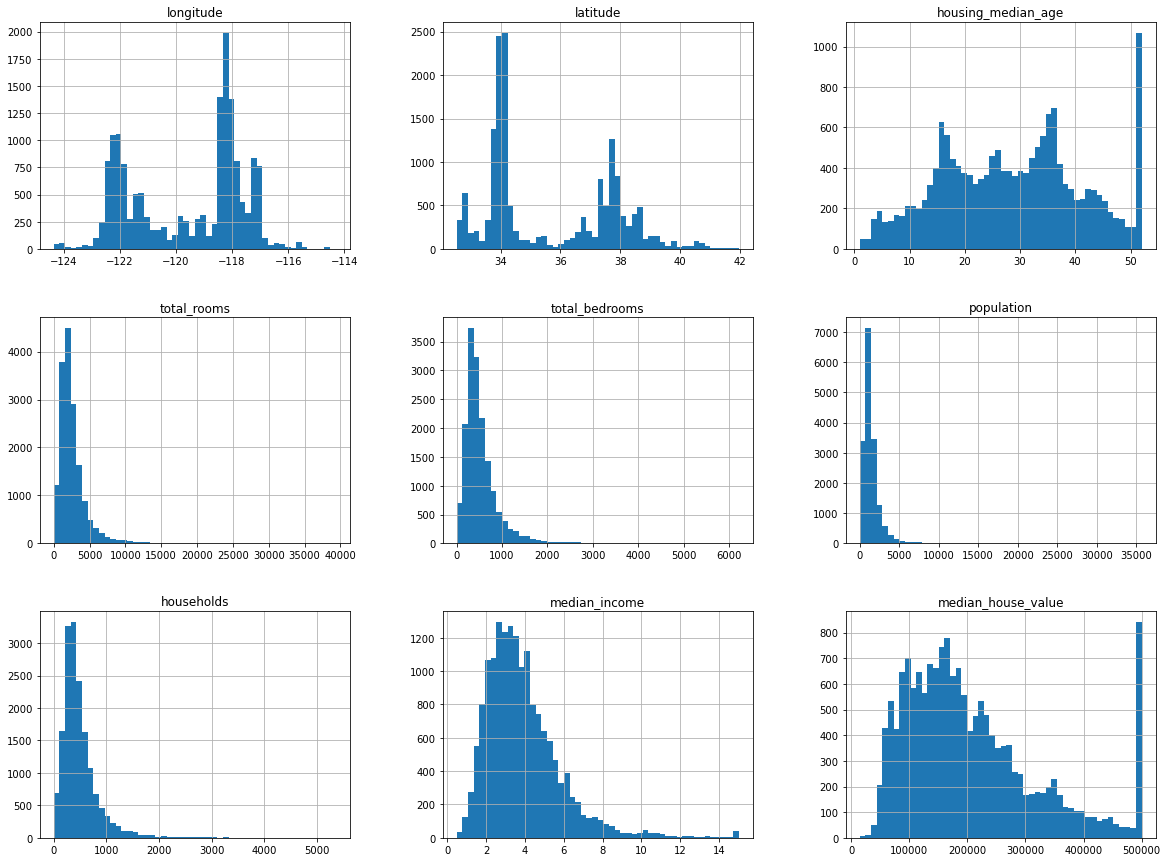

In [27]:
train_data.hist(bins=50,figsize=(20,15))

<AxesSubplot:>

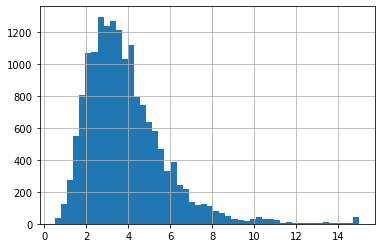

In [28]:
train_data["median_income"].hist(bins=50)

# Correlation Matrices

<AxesSubplot:>

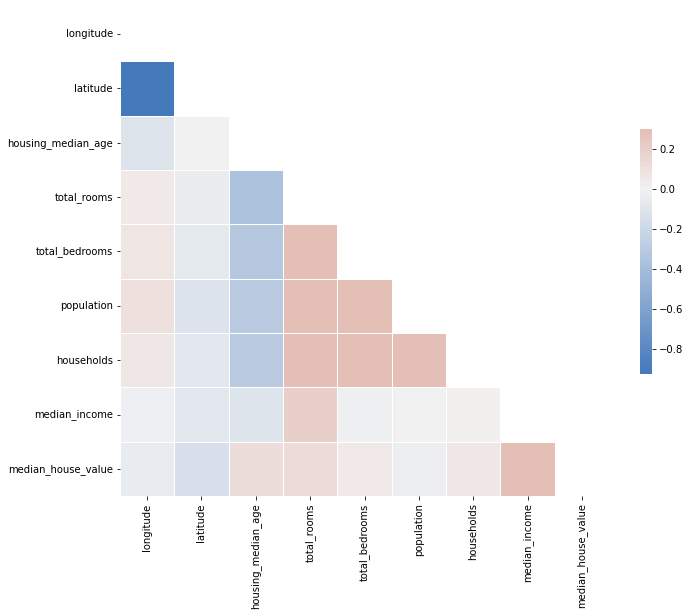

In [30]:
corr=train_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(250, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Preparing Data for Machine Learning


In [31]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


## Dealing with missing values

In [32]:
sample_incomplete_rows=housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [33]:
#droping the incomplete rows
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) #option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [34]:
#droping the incomplete columns
sample_incomplete_rows.drop("total_bedrooms",axis=1) #option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [35]:
#input missing values

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [36]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [37]:
housing_num=housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [38]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [40]:
x=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


## Encode Categorical Variables

In [41]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [42]:
housing_cat=data[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [43]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder =  OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
#housing_cat_encoded[50:10000:100]

In [44]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder =  OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Feature Engineering

In [45]:
def feature_engineering(data):
    data["bedrooms_per_household"] =  data["total_bedrooms"] / data["households"]
    data["population_per_household"] =  data["population"] / data["households"]
    data["total_rooms_per_household"] =  data["total_rooms"] / data["households"]
    
    return data

In [47]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,total_rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


# Scaling our data

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_feature_engineered)
pd.DataFrame(housing_scaled,columns=housing_num.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,total_rooms_per_household
0,-0.941350,1.347438,0.027564,0.584777,0.635123,0.732602,0.556286,-0.893647,0.058962,0.006223,0.017395
1,1.171782,-1.192440,-1.722018,1.261467,0.775677,0.533612,0.721318,1.292168,0.028308,-0.040811,0.569256
2,0.267581,-0.125972,1.220460,-0.469773,-0.545045,-0.674675,-0.524407,-0.525434,-0.128648,-0.075371,-0.018024
3,1.221738,-1.351474,-0.370069,-0.348652,-0.038567,-0.467617,-0.037297,-0.865929,-0.047761,-0.106803,-0.595140
4,0.437431,-0.635818,-0.131489,0.427179,0.269198,0.374060,0.220898,0.325752,0.029313,0.006109,0.251241
...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.686854,0.543471,1.341519,0.637374,0.257003,-0.092580,0.466353
16508,-0.921368,1.342761,-1.085806,2.468471,2.149712,3.002174,2.451492,-0.557509,-0.188550,0.023024,0.050362
16509,-1.570794,1.310018,1.538566,-0.895802,-0.894007,-0.862013,-0.865118,-0.365475,-0.262573,-0.037436,-0.509240
16510,-1.560803,1.249211,-1.165333,0.249005,0.109257,-0.189747,0.010616,0.168261,0.115482,-0.059156,0.328149


## Standard steps taken in order while data preprocessing

In [49]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

def data_transformations(data):
    ##seperating labels
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data=data.drop("median_house_value",axis=1)
    else:
        labels=None

    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns)

    #creating a list of features for future use

    ##Imputing data
    from sklearn.impute import SimpleImputer
    imputer=SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed=imputer.fit_transform(housing_num)

    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder

    cat_encoder =  OneHotEncoder(sparse=False)

    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features=features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity")
    # print(features)
    # print(cat_encoder.categories_[0].tolist())

    ##Scaling Numerical data
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    housing_scaled = scaler.fit_transform(imputed)

    # pd.DataFrame(housing_scaled,columns=housing_num.columns)

    #concatenating data
    output = np.hstack([housing_scaled,housing_cat_1hot])

    return output, labels , features

# Select and Train Model

In [50]:
train_data,train_labels,features=data_transformations(strat_train_set)
test_data,test_labels,features=data_transformations(strat_test_set)

# train_data
# train_labels
# features


# Linear Regeression

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_data, train_labels)

LinearRegression()

In [52]:
predicted_values = lin_reg.predict(test_data)

In [53]:
comparison_data = pd.DataFrame(data={"original_values":test_labels,"predicted_values":predicted_values,
                                     "differences":test_labels-predicted_values})
comparison_data

,original_values,predicted_values,differences
5241,500001.0,421436.985982,78564.014018
17352,162500.0,288955.577066,-126455.577066
3505,204600.0,244465.297215,-39865.297215
7777,159700.0,195506.027223,-35806.027223
14155,184000.0,259951.750767,-75951.750767
...,...,...,...
12182,110000.0,146353.344211,-36353.344211
7275,118800.0,151868.243549,-33068.243549
17223,293800.0,309820.470355,-16020.470355
10786,335700.0,269301.329612,66398.670388


In [54]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(test_labels,predicted_values)
lin_mse =  np.sqrt(lin_mse)
lin_mse


67127.29425144756

In [55]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(test_labels,predicted_values)
lin_mae


49602.54297374852

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data,train_labels)


DecisionTreeRegressor(random_state=42)

In [57]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels,train_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

# Cross Validation
It seems out performance was top-notch.Instead of just splitting our data into a train and test set and training once, we can do something called K-Fold Cross Validation which will split our training dataset into 10 folds(sections) training on 9 of them and testing on the 10th. It does this for all of the folds which can let us more rigorously evaluate the model.

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_data, train_labels, scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [59]:
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviaton: ",scores.std())


In [60]:
display_scores(tree_rmse_scores)    

Scores:  [70819.83674558 70585.09139446 69861.50467212 73083.46385442
 66246.62162221 74093.76616605 77298.21284135 70265.05374821
 70413.46481703 72693.02785945]
Mean:  71536.00437208822
Standard deviaton:  2802.723447985299


In [61]:
# Random Forest Regressor is basically a bunch of decision tree methods run one after the other
#   yielding great results
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(train_data,train_labels)

RandomForestRegressor(random_state=42)

In [62]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels,train_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18797.81343373367

In [63]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, train_data, train_labels, scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores:  [51667.47890087 49581.77674843 46845.77133522 52127.48739086
 48082.89639917 51050.84681689 53027.94987383 50218.59780997
 48609.03966622 54669.97457167]
Mean:  50588.18195131385
Standard deviaton:  2273.9929947683154


## Fine tuning our model
After picking a model or a set of models that look promising, we might need to fine-tune the hyper-parameters, in order to find the best ones to use for our model.

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [74]:
param_grid=[
    # trying 12 (3*4) combinations of hyperparameters
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    # then try 6 (2*3) combinations with bootstrap set as false
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

# train across 5 folds that's total (12+6)*5 =90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid,cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
from sklearn.model_selection import RandomizedSearchCV

param_distribution=[
    {'n_estimators':randint(low=1,high=200), 
     'max_features':randint(low=1,high=8)},
    ]

# train across 5 folds that's total (12+6)*5 =90 rounds of training 
rnd_search = RandomizedSearchCV(forest_reg, 
                           param_distributions = param_distribution,
                           n_iter=10,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           random_state=42,
                           return_train_score=True)

rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions=[{'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f56e0d46c10>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f56e0d46f40>}],
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [77]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score), params)

64441.33583774864 {'max_features': 2, 'n_estimators': 3}
55010.78729315784 {'max_features': 2, 'n_estimators': 10}
52756.90743676946 {'max_features': 2, 'n_estimators': 30}
60419.95105027927 {'max_features': 4, 'n_estimators': 3}
52548.760723492225 {'max_features': 4, 'n_estimators': 10}
50475.03023921768 {'max_features': 4, 'n_estimators': 30}
58658.87553276854 {'max_features': 6, 'n_estimators': 3}
51688.259845013825 {'max_features': 6, 'n_estimators': 10}
49602.83903888296 {'max_features': 6, 'n_estimators': 30}
57764.545176887186 {'max_features': 8, 'n_estimators': 3}
51906.606161086886 {'max_features': 8, 'n_estimators': 10}
49851.77165193962 {'max_features': 8, 'n_estimators': 30}
63137.43571927858 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54419.40582754731 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58195.29390064867 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52168.74519952844 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [82]:
# Grid search cv_results_ parameters and respective data
grid_search.cv_results_

In [83]:
cvres = rnd_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score), params)

48881.00597871309 {'max_features': 7, 'n_estimators': 180}
51634.61963021687 {'max_features': 5, 'n_estimators': 15}
50312.55245794906 {'max_features': 3, 'n_estimators': 72}
50952.54821857023 {'max_features': 5, 'n_estimators': 21}
49063.34454115586 {'max_features': 7, 'n_estimators': 122}
50317.63324666772 {'max_features': 3, 'n_estimators': 75}
50173.504527094505 {'max_features': 3, 'n_estimators': 88}
49248.29804214526 {'max_features': 5, 'n_estimators': 100}
50054.94886918995 {'max_features': 3, 'n_estimators': 150}
64847.94779269648 {'max_features': 5, 'n_estimators': 2}


In [85]:
# # Randomized search cv_results_ parameters and respective data
rnd_search.cv_results_

In [89]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance_list = list(zip(features,feature_importance.tolist()))
feature_importance_list

[('longitude', 0.0846978271965227),
 ('latitude', 0.07699839747855737),
 ('housing_median_age', 0.040871579612884096),
 ('total_rooms', 0.016732571900462085),
 ('total_bedrooms', 0.01714183399184058),
 ('population', 0.0173518184721046),
 ('households', 0.015630353131298083),
 ('median_income', 0.3398242154869636),
 ('bedrooms_per_household', 0.023052810363875926),
 ('population_per_household', 0.10403370064780083),
 ('total_rooms_per_household', 0.08649835942626646),
 ('<1H OCEAN', 0.012927314349565632),
 ('INLAND', 0.15466394981681342),
 ('ISLAND', 7.222175467748088e-05),
 ('NEAR BAY', 0.003622052794433035),
 ('NEAR OCEAN', 0.005880993575933964)]

<BarContainer object of 16 artists>

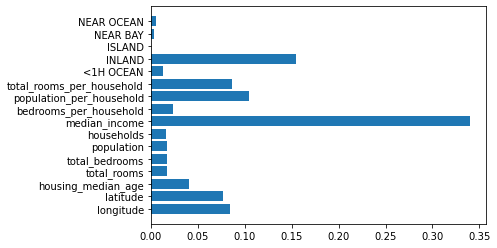

In [90]:
plt.barh(y=features,width=feature_importance.tolist())

In [92]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

63301.179203602675

In [ ]:
# THE PURPOSE OF THIS NOTEBOOK IS TO BE REFFERED TO WHILE WORKING WITH DATASETS . FROM VISUALIZING DATA TO PREPROCESSING AND FROM MODEL SELECTION TO HYPERPARAMETER TUNING ,ALL THOSE METHODS AND REQUIRED LIBRARIES AND THEIR USES ARE MENTIONED AND APPLIED IN THIS NOTEBOOK ,HENCE IT WILL GUIDE ME 